# NAME :- Kartikeya Gupta

# Task 1- Optical Character Recognition (OCR)

**Imports**

In [29]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load Test Image

In [30]:
try:
    img = cv2.imread("test_images/test_image_3.tif")
    print("Image Loaded successfully.")
except:
    print("Image Path not Found!")

Image Loaded successfully.


**Display Test Image**

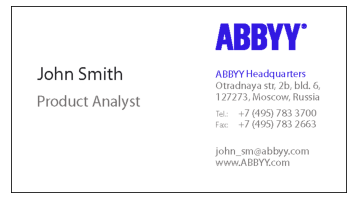

In [31]:
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(img)
plt.show()


## Prepare Image For Text Extraction

**Convert Image to Grayscale**

In [32]:
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

**Kernel Definition**

In [33]:
kernel = np.ones((1, 1), np.uint8)

**Apply Dilation to avoid Distortion**

In [34]:
converted_img = cv2.dilate(converted_img, kernel, iterations = 1)

**Remove Noise from the Image**

In [35]:
converted_img = cv2.erode(converted_img, kernel, iterations = 1)

**Display Prepared Image for text Extraction**

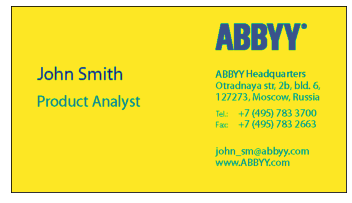

In [36]:
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(converted_img)
plt.show()

# Detect Text From Image

**Extract Text from Image**

In [37]:
try:
    text = pytesseract.image_to_string(converted_img)
    print("Text Extracted Successfully.")
except:
    print("Text Extraction Failed!")

Text Extracted Successfully.


**Print Final Text**

In [38]:
print(text)

ABBYY

John Smith ABBYY Headquarters
Otradnaya str, 2b, bld. 6,
127273, Moscow, Russia

Tel: +7 (495) 783 3700
Fax: +7 (495) 783 2663

Product Analyst

john_sm@abbyy.com
www.ABBYY.com



**Highlight Detected Text**

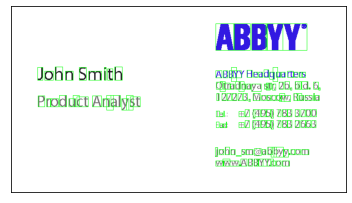

In [39]:
val_lst = list(img.shape)
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    processed_img = cv2.rectangle(img, (int(b[1]), val_lst[0]-int(b[2])), (int(b[3]), val_lst[0]-int(b[4])), (0, 255, 0), 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(processed_img)
plt.show()

## Write Result Images

In [40]:
try:
    cv2.imwrite("Converted_Image.jpg", converted_img)
    cv2.imwrite("Processed_Image.jpg", processed_img)
    print("Image Saved Successfully.")
except Exception as e:
    print(e)

Image Saved Successfully.
